### Загрузка компонент модели

In [751]:
%run preprocessing.py
%run indexer.py
%run validator.py

### Задание параметров модели

In [677]:
BASE_WINDOW = 3600 * 6
MAXIMUM_LAG = 20
INDEXER_HASH_BUCKETS = 5000
ACTIVITY_THRESHOLD = 3

### Загрузка данных, преобразование во временные ряды

In [678]:
vk_df = load_stream_data('data/vk.json')

Preprocessing: started reading data/vk.json
Preprocessing: 2187657 events loaded from fs


In [679]:
timeseries = df_to_time_series(vk_df, BASE_WINDOW)

Preprocessing: converting to author’s activities timeseries
Preprocessing: getting rid of authors with less than 2 activities


### Приближенное выделение автоматизированных аккаунтов с применением random projections

In [680]:
suspicious_timeseries = run_indexer(
    timeseries,
    BASE_WINDOW,
    MAXIMUM_LAG,
    INDEXER_HASH_BUCKETS,
    ACTIVITY_THRESHOLD
)

Indexer: started indexing 4093 author activities within 6.0 hours window
Indexer: using maximum lag of 20 and 5000 hash buckets
Indexer: building random projections…
Indexer: bucketizing authors…
Indexer: extracting suspicious users…
Indexer: 690 suspects found
Indexer: 117 suspects remained after applying activity threshold of 3


### Кластеризация, выделение групп автоматизированных аккаунтов

In [646]:
distance_matrix = run_validator(suspicious_timeseries, MAXIMUM_LAG)

call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call
call


KeyboardInterrupt: 

### ...

Validator: computing cDTW distance matrix on 8 CPUs
Validator: clustering
Validator: done
CPU times: user 1min 3s, sys: 1min 8s, total: 2min 12s
Wall time: 26min 48s


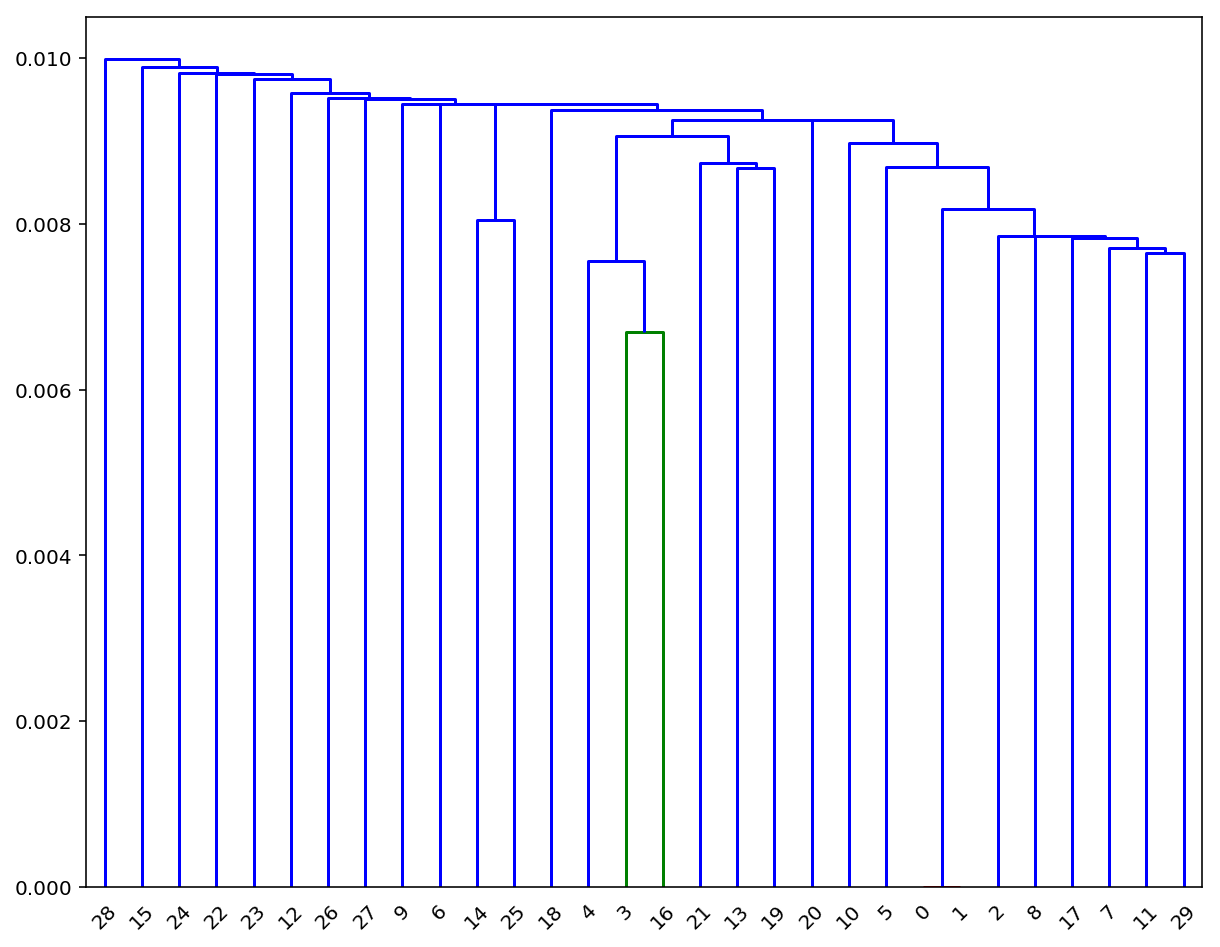

In [755]:
%%time

subsample = {
    -161085605: suspicious_timeseries[-161085605],
    -161085327: suspicious_timeseries[-161085327]
}

for key, value in suspicious_timeseries.items():
    if (len(subsample) < 30):
        subsample[key] = value

clusters = run_validator(subsample, MAXIMUM_LAG)

In [756]:
clusters

{1: [452797202],
 2: [173985706],
 3: [-75221198],
 4: [-60932039],
 5: [-71686014],
 6: [362106001],
 7: [447906610],
 8: [-33078588],
 9: [-161085605, -161085327],
 10: [181715108],
 11: [277862351],
 12: [172818514],
 13: [17780421],
 14: [260570253],
 15: [-76204834],
 16: [-67167848],
 17: [7101251],
 18: [-67970175],
 19: [204093334],
 20: [154256321],
 21: [-80780362],
 22: [241750453],
 23: [241347616],
 24: [335640023],
 25: [15463508],
 26: [4112920],
 27: [87414871],
 28: [-95539212],
 29: [272310900]}

In [754]:
vk_df[vk_df['author'].apply(lambda author: author in [-161085605, -161085327])]

,time,action,type,tags,author,text,url
573857,1517666526,new,post,[grudinin],-161085605,Региональная группа ПДС НПСР в Республики Баш...,https://vk.com/wall-161085605_6
574081,1517666808,new,post,[grudinin],-161085605,Региональная группа ПДС НПСР в Республике Башк...,https://vk.com/wall-161085605_7
575566,1517668697,new,post,"[grudinin, putin]",-161085605,Павел Грудинин на митинге &quot;За социальную ...,https://vk.com/wall-161085605_8
576018,1517669261,new,post,"[grudinin, putin]",-161085327,Павел Грудинин на митинге &quot;За социальную ...,https://vk.com/wall-161085327_3
578982,1517672702,new,post,"[grudinin, putin]",-161085605,Когда много работаешь - мало тратишь ...<br>#Г...,https://vk.com/wall-161085605_9
579283,1517673061,new,post,"[grudinin, putin]",-161085327,Когда много работаешь - мало тратишь ...<br>#Г...,https://vk.com/wall-161085327_4
681572,1517844579,new,post,"[grudinin, putin]",-161085605,Кандидат который ЗА ВСЕХ &#33;&#33;&#33;<br>#Г...,https://vk.com/wall-161085605_10
681897,1517844921,new,post,"[grudinin, putin]",-161085327,Кандидат который ЗА ВСЕХ &#33;&#33;&#33;<br>#Г...,https://vk.com/wall-161085327_5
726344,1517920458,new,post,"[grudinin, putin]",-161085605,При таком то союзе мы просто обязаны победить ...,https://vk.com/wall-161085605_11
728333,1517922513,new,post,"[grudinin, putin]",-161085327,При таком то союзе мы просто обязаны победить ...,https://vk.com/wall-161085327_7
